<a href="https://colab.research.google.com/github/yasminemasmoudi/Backend-pets/blob/master/SMS_Spam_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Dataset
[The SMS Spam Collection dataset](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection#) which contains a set of SMS messages that are labeled as either spam or ham (non-spam). The messages were collected from a variety of sources, including mobile phone users and online message boards.

The dataset contains a total of 5,574 messages, with 4,827 messages labeled as ham and 747 messages labeled as spam. Each message is stored as a separate file, with the file name indicating whether the message is spam or ham.

In addition to the message content, the dataset also includes other features such as the message length and the frequency of certain words in the message. 

## Understanding the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv("/content/SMSSpamCollection.csv", sep="\t")
df.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [3]:
df = pd.read_csv("/content/SMSSpamCollection.csv", sep="\t", header = None)
df.columns=["label", "body_text"]
df.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   object
 1   body_text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,label,body_text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:

df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
df.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

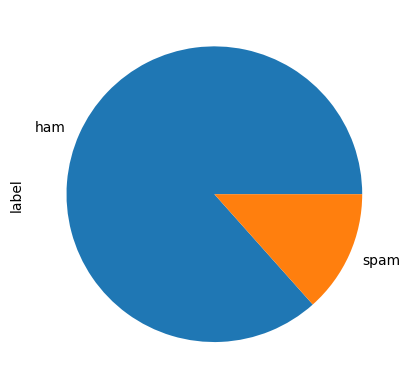

In [9]:
df.label.value_counts(normalize=True).plot.pie()
plt.show()

In [10]:
df.isnull().value_counts()

label  body_text
False  False        5572
dtype: int64

In [11]:
dfspam = df.copy()

## Data preparation / Pre-processing data text
Pre-processing involves transforming raw text data into a format that is more amenable to analysis or modeling.


**1- Removing ponctuation + Converting text to lowercase**

In [12]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punct(text):
  punct = string.punctuation
  text_no_punct = "".join(char for char in text if char not in punct)
  return text_no_punct
  
dfspam['body_text_no_punct'] = dfspam['body_text'].apply(lambda x: remove_punct(x.lower()))
dfspam.head()

,label,body_text,body_text_no_punct
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


**2- Tokenization, Stemming & Lemmatization**

**Tokenization** is the process of breaking up text into individual words or tokens. 

**Stemming** is the process of reducing inflected or derived words to their base or root form. 

**Lemmatization** is similar to stemming in that it involves reducing words to their base form, but it is a more sophisticated technique that takes into account the context of the word.

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
 from nltk.tokenize import word_tokenize
def tokenize(text):
  tokens = word_tokenize(text)
  return tokens
  
dfspam['body_text_tokenized'] = dfspam['body_text_no_punct'].apply(lambda x: tokenize(x))
dfspam.head()

,label,body_text,body_text_no_punct,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [16]:
#Removing stop words ("the" , "an", "a", "in" ...)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')
#stopwords_en

In [18]:

def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stopwords_en]
  return text

dfspam['body_text_nostop'] = dfspam['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
dfspam.head()

,label,body_text,body_text_no_punct,body_text_tokenized,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [19]:
ps = nltk.PorterStemmer()
#dir(ps)

In [20]:
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

dfspam['body_text_stemmed'] = dfspam['body_text_nostop'].apply(lambda x: stemming(x))
dfspam.head()

,label,body_text,body_text_no_punct,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
wnl = nltk.WordNetLemmatizer()
#dir(wnl)

In [23]:
def Lemmatizing(tokenized_text):
  text = [wnl.lemmatize(word) for word in tokenized_text]
  return text

dfspam['body_text_lemmatized'] = dfspam['body_text_nostop'].apply(lambda x:  Lemmatizing(x))
dfspam.head()

,label,body_text,body_text_no_punct,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"


In [24]:
from nltk.tokenize import word_tokenize
#text cleaning All in one function

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens=word_tokenize(text)
  text=" ".join([ps.stem(word) for word in tokens if word not in stopwords_en])
  return text
dfspam = dfspam[['label','body_text']]
dfspam['cleaned_text'] = dfspam['body_text'].apply(lambda x:  clean_text(x))
dfspam.head()

,label,body_text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


**3- Text_Vectorization**

 There are several techniques for text vectorization, including:

*  Count vectorization
*  N-Grams
*  Term Frequency-Inverse Document Frequency (TF-IDF)




**i. Count vectorization** is a text preprocessing technique that involves converting a collection of text documents into a matrix of token counts where each row corresponds to a document (SMS in our case), and each column corresponds to a specific word or term in the vocabulary.

If we select only 10 messages and assume that we have 200 unique words the final result will be like this:

10 rows with 200 columns

►►►We are going to use **Sparse Matrix**.

when you have a matrix in which a very high percent of the entries are zero, instead of storing all these zeros in the full matrix, which would make it extremely inefficient, it'll just be converted to only storing the locations and the values of the non-zero elements, which is much more efficient for storage.

Sparse Matrix: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features_CountVect = vectorizer.fit_transform(dfspam['cleaned_text'])
print(features_CountVect.shape)
print("Sparse Matrix is: \n" , features_CountVect)
features_CountVect = pd.DataFrame(features_CountVect.toarray())
features_CountVect.columns = vectorizer.get_feature_names_out()
features_CountVect

(5572, 8092)
Sparse Matrix is: 
   (0, 3314)	1
  (0, 4094)	1
  (0, 5583)	1
  (0, 2233)	1
  (0, 1335)	1
  (0, 1739)	1
  (0, 3403)	1
  (0, 7848)	1
  (0, 4238)	1
  (0, 1737)	1
  (0, 2015)	1
  (0, 3366)	1
  (0, 1146)	1
  (0, 7644)	1
  (1, 5211)	1
  (1, 4273)	1
  (1, 4060)	1
  (1, 7760)	1
  (1, 5241)	1
  (2, 3128)	1
  (2, 2784)	2
  (2, 7807)	1
  (2, 2111)	1
  (2, 7773)	1
  (2, 2902)	2
  :	:
  (5568, 3314)	1
  (5568, 3662)	1
  (5568, 3117)	1
  (5568, 2812)	1
  (5569, 6822)	1
  (5569, 4826)	1
  (5569, 5520)	1
  (5569, 6520)	1
  (5570, 3128)	1
  (5570, 7683)	1
  (5570, 3794)	1
  (5570, 4362)	1
  (5570, 5007)	1
  (5570, 7464)	1
  (5570, 6542)	1
  (5570, 1766)	1
  (5570, 2742)	1
  (5570, 3233)	1
  (5570, 3455)	1
  (5570, 3909)	1
  (5570, 986)	1
  (5570, 1553)	1
  (5571, 4929)	1
  (5571, 7298)	1
  (5571, 6062)	1


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


ii. The n-grams process creates a document-term matrix like we saw before. Now we still have one row per text message and we still have counts that occupy the individual cells but instead of the columns representing single terms,here ;all combinations of adjacent words of length and in your text.

In [26]:
ngram_vect = CountVectorizer(ngram_range=(1,3))
features_ngram = ngram_vect.fit_transform(dfspam['cleaned_text'])
print(features_ngram.shape)
print("Sparse Matrix is: \n" , features_ngram)
features_ngram = pd.DataFrame(features_ngram.toarray())
features_ngram.columns = ngram_vect.get_feature_names_out()
features_ngram

(5572, 71184)
Sparse Matrix is: 
   (0, 24614)	1
  (0, 32763)	1
  (0, 47955)	1
  (0, 14595)	1
  (0, 6491)	1
  (0, 9598)	1
  (0, 26375)	1
  (0, 69193)	1
  (0, 33917)	1
  (0, 9590)	1
  (0, 12360)	1
  (0, 25850)	1
  (0, 4952)	1
  (0, 66682)	1
  (0, 24894)	1
  (0, 32764)	1
  (0, 47970)	1
  (0, 14598)	1
  (0, 6494)	1
  (0, 9602)	1
  (0, 26509)	1
  (0, 69216)	1
  (0, 33918)	1
  (0, 9591)	1
  (0, 12371)	1
  :	:
  (5570, 30269)	1
  (5570, 31725)	1
  (5570, 9825)	1
  (5570, 19026)	1
  (5570, 67265)	1
  (5570, 23428)	1
  (5570, 64967)	1
  (5570, 26846)	1
  (5570, 8411)	1
  (5570, 3614)	1
  (5570, 35487)	1
  (5570, 30270)	1
  (5570, 31726)	1
  (5570, 9826)	1
  (5570, 55875)	1
  (5570, 19027)	1
  (5570, 42915)	1
  (5570, 67266)	1
  (5570, 23429)	1
  (5571, 41916)	1
  (5571, 63341)	1
  (5571, 51438)	1
  (5571, 51441)	1
  (5571, 63365)	1
  (5571, 51442)	1


,008704050406,008704050406 sp,008704050406 sp arrow,0089mi,0089mi last,0089mi last four,0121,0121 2025050,0121 2025050 visit,01223585236,...,zyada kisi ko,üll,üll finish,üll finish buy,üll submit,üll submit da,üll take,üll take forev,〨ud,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**iii. Term Frequency-Inverse Document Frequency (TF-IDF)** creates a document term matrix, where there's still one row per text message and the columns still represent single unique terms.

But instead of the cells representing the **count**, the cells represent a **weighting** that's meant to identify how important a word is to an individual text message.

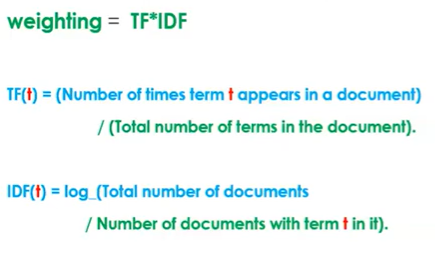



In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(2,2))
features_tfidf = tfidf.fit_transform(dfspam['cleaned_text'])
print(features_tfidf.shape)
print("Sparse Matrix is: \n" , features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names_out()
features_tfidf

(5572, 31326)
Sparse Matrix is: 
   (0, 1938)	0.2773500981126146
  (0, 11219)	0.2773500981126146
  (0, 5276)	0.2773500981126146
  (0, 4017)	0.2773500981126146
  (0, 14680)	0.2773500981126146
  (0, 30463)	0.2773500981126146
  (0, 11502)	0.2773500981126146
  (0, 4022)	0.2773500981126146
  (0, 2635)	0.2773500981126146
  (0, 6267)	0.2773500981126146
  (0, 20969)	0.2773500981126146
  (0, 14169)	0.2773500981126146
  (0, 10829)	0.2773500981126146
  (1, 29982)	0.5126274600081803
  (1, 14091)	0.5126274600081803
  (1, 14764)	0.5126274600081803
  (1, 19453)	0.4600426738213366
  (2, 2229)	0.22133068873751155
  (2, 21710)	0.22133068873751155
  (2, 28062)	0.22133068873751155
  (2, 21578)	0.22133068873751155
  (2, 8396)	0.22133068873751155
  (2, 21956)	0.22133068873751155
  (2, 1123)	0.22133068873751155
  (2, 8814)	0.22133068873751155
  :	:
  (5567, 670)	0.2537004480728817
  (5567, 21293)	0.2243885070985284
  (5567, 20308)	0.24928925658739495
  (5567, 27791)	0.20674516444944924
  (5568, 9631)	0.57735

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4- Feature Engineering**

### New feature = Length of the message

▸ Hypothese: Spam tends to be a little bit longer than real text messages.


In [28]:
dfspam['body_len'] = dfspam['body_text'].apply(lambda x: len(x)-x.count(' '))
dfspam.head()

,label,body_text,cleaned_text,body_len
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,92
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,128
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49


 
### New feature = percent of text that is punctuation

▸ Hypothese: real text messages use less punctuation than spam.


In [29]:
def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/ (len(text) - text.count(" ")) , 3)*100

dfspam['punct %'] = dfspam['body_text'].apply(lambda x: count_punct(x))
dfspam.head()

,label,body_text,cleaned_text,body_len,punct %
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,92,9.8
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.7
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49,4.1


### New feature = percent of characters in capital letters

▸ Hypothese: real text messages use less capital letters than spam

In [30]:
def count_cap(text):
  count = sum([1 for char in text if char.isupper()])
  return round(count/ (len(text) - text.count(" ")) , 3)*100

dfspam['cap %'] = dfspam['body_text'].apply(lambda x: count_cap(x))
dfspam.head()

,label,body_text,cleaned_text,body_len,punct %,cap %
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,92,9.8,3.3
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24,25.0,8.3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.7,7.8
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39,15.4,5.1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49,4.1,4.1


### Feature scaling 

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
vars = ["body_len", "punct %" , "cap %"]
dfspam[vars] = scaler.fit_transform(dfspam[vars])

In [33]:
dfspam.head()

,label,body_text,cleaned_text,body_len,punct %,cap %
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0.121951,0.098,0.033
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0.029810,0.250,0.083
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,0.170732,0.047,0.078
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0.050136,0.154,0.051
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,0.063686,0.041,0.041


In [34]:
features_tfidf.shape

(5572, 31326)

In [35]:
dfspam.shape

(5572, 6)

In [40]:
X = pd.concat([dfspam["body_len"],dfspam["punct %"], dfspam["cap %"], pd.DataFrame(features_tfidf)], axis=1)
X.head()

,body_len,punct %,cap %,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0.121951,0.098,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.029810,0.250,0.083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.170732,0.047,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050136,0.154,0.051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.063686,0.041,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold , cross_val_score
rf = RandomForestClassifier(n_jobs = -1)
kfold = KFold(n_splits = 5)
cross_val_score(rf , X , dfspam["label"], cv=kfold , scoring="accuracy",n_jobs=-1 )

array([0.95336323, 0.95695067, 0.95780969, 0.94254937, 0.94883303])

### Model Selection & Building

For our SMS Spam filtering project

▸ We can build a random forest with 100 decision trees in it.

▸ Then each decision trees are built independently, and it will predict either spam or ham.

▸ Assume 70 of those decision trees predict spam and 30 predict ham.

▸ Then will apply simple voting method for the trees:

► Max Voting

► Averaging

► Weighted Averaging

▸ Then the final prediction of the random forest model will be spam if we applied the Max Voting method.

▸ In our project will use the simplest voting technique which is Max Voting

In [42]:
target = dfspam["label"]

In [43]:
final_df = dfspam.drop(["label", "cleaned_text","body_text"], axis=1)

In [44]:
features_tfidf.head()

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
final_df = pd.concat([final_df , pd.DataFrame(features_tfidf)], axis=1)

In [46]:
final_df.head()

,body_len,punct %,cap %,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0.121951,0.098,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.029810,0.250,0.083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.170732,0.047,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050136,0.154,0.051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.063686,0.041,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
target.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [48]:
#Split training and testing datasets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(final_df , target,test_size=0.25)

In [50]:
print("X_train.shape = " , X_train.shape)
print("X_test.shape = " , X_test.shape)
print("y_train.shape = " , y_train.shape)
print("y_test.shape = " , y_test.shape)

X_train.shape =  (4179, 31329)
X_test.shape =  (1393, 31329)
y_train.shape =  (4179,)
y_test.shape =  (1393,)


In [51]:
X_train.head()

,body_len,punct %,cap %,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
4289,0.084011,0.000,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2727,0.046070,0.000,0.028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,0.107046,0.025,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3032,0.100271,0.053,0.013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4159,0.084011,0.000,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
y_train.head()

4289    ham
2727    ham
749     ham
3032    ham
4159    ham
Name: label, dtype: object

In [53]:
#RandomForest Algo
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_jobs = -1, n_estimators = 200)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9526202440775305

In [ ]:
#Checking the feature_importances 
sorted(zip(rf_model.feature_importances_ , X_train.columns), reverse=True)[0:10]

### Model Evaluation: Accuracy & Confusion Matrix

In [54]:
accuracy = round(rf_model.score(X_test, y_test), 3)
accuracy

0.953

In [56]:
from sklearn.metrics import confusion_matrix
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1196,    0],
       [  66,  131]])

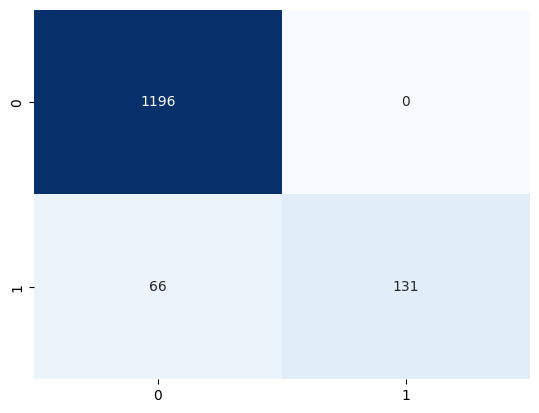

In [58]:
sns.heatmap(cm, annot=True, cmap='Blues',cbar=False, fmt='d')
plt.show()